# Intro Lab 6 - Torsional Pendulum

In [1]:
# Import packages
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math
# Tell notebook server to show plots inline
%matplotlib inline

In [2]:
def final_value(x, mean_lst, err_lst):
    #calculates mean
    mean = np.mean(x)
    
    #calculates sample standard deviation (takes into account ddof=1)
    n = len(x)
    deviation_sum = 0
    for i in x:
        deviation_sum += (i - mean)**2
    sample_std = (deviation_sum / (n - 1)) ** 0.5

    #calculates standard error
    std_error = sample_std/(n**0.5)
    
    #appending to the lists
    mean_lst.append(round(mean, 2))
    err_lst.append(round(std_error, 2))
    
    print(f"Mean ± Standard Error: {round(mean, 3)} ± {round(std_error, 3)}")
    
def moment_inertia(diameter_cm, mass_g, diameter_error, mass_error): #enter mass in grams and diameter in cm
    diameter = diameter_cm / 100
    mass = mass_g / 1000
    moi = (1 / 8) * (diameter ** 2) * mass
    moi_error = 1/8 * mass * diameter**2 * np.sqrt((mass_error/mass)**2 + (diameter_error/diameter)**2)
    print(f"The moment of inertia is: {moi} ± {moi_error}")
    return moi, moi_error

## Data for Time Period

In [3]:
#time period for 10 oscillations
time_d0 = [8.13, 8.12, 8.26, 8.06, 8.17]
time_d1 = [9.87, 9.98, 9.93, 9.85, 9.86]
time_d3 = [12.85, 12.71, 12.79, 12.79, 12.72]
time_d5 = [14.97, 14.84, 14.85, 15.04, 14.85]
time_d7 = [16.99, 17.02, 16.84, 17.05, 17.14]
time_d9 = [18.83, 18.82, 18.65, 18.81, 18.86]

time_10_mean, time_10_err = [], []

final_value(time_d0, time_10_mean, time_10_err)
final_value(time_d1, time_10_mean, time_10_err)
final_value(time_d3, time_10_mean, time_10_err)
final_value(time_d5, time_10_mean, time_10_err)
final_value(time_d7, time_10_mean, time_10_err)
final_value(time_d9, time_10_mean, time_10_err)

print(time_10_mean)
print(time_10_err)

Mean ± Standard Error: 8.148 ± 0.033
Mean ± Standard Error: 9.898 ± 0.025
Mean ± Standard Error: 12.772 ± 0.026
Mean ± Standard Error: 14.91 ± 0.04
Mean ± Standard Error: 17.008 ± 0.049
Mean ± Standard Error: 18.794 ± 0.037
[8.15, 9.9, 12.77, 14.91, 17.01, 18.79]
[0.03, 0.02, 0.03, 0.04, 0.05, 0.04]


In [4]:
#obtaining time period for a single oscillation
time_single_mean = [mean / 10 for mean in time_10_mean] 
time_single_err = [err / 10 for err in time_10_err]

print(time_single_mean)
print(time_single_err)

[0.8150000000000001, 0.99, 1.277, 1.491, 1.701, 1.879]
[0.003, 0.002, 0.003, 0.004, 0.005, 0.004]


In [5]:
#squaring time periods for single oscillations and obtaining errors for that quantity
time_squared_mean = [time ** 2 for time in time_single_mean]
time_squared_err = [2 * time_single_mean[i] * time_single_err[i] for i in range(len(time_single_err))]

print(time_squared_mean)
print(time_squared_err)

[0.6642250000000001, 0.9801, 1.6307289999999999, 2.2230810000000005, 2.8934010000000003, 3.530641]
[0.00489, 0.00396, 0.0076619999999999995, 0.011928000000000001, 0.01701, 0.015032]


## Data for Moment of Inertia

In [6]:
#calculating moment of inertia for a single disk and the holder

masses = [50, 70, 110, 150, 190, 230] #in grams
disk_mass = 20                        #in grams
holder_mass = 50                      #in grams

disk_moi, disk_moi_error = moment_inertia(2.625, 20, 0.00019, 0.0001) #single disk
holder_moi, holder_moi_error = moment_inertia(2.623, 50, 0.00022, 0.0001) #holder

The moment of inertia is: 1.7226562499999997e-06 ± 1.5154482520168795e-08
The moment of inertia is: 4.300080625000002e-06 ± 3.707744816716089e-08


In [7]:
#calculating total moment of inertia for each setup

moi_tot = [holder_moi]
moi_tot_err = [holder_moi_error]
for i in range(1, 10, 2):
    moi_tot.append(holder_moi + (i * disk_moi))
    moi_tot_err.append(((holder_moi_error ** 2) + i * (disk_moi_error ** 2)) ** 0.5)

print(moi_tot)
print(moi_tot_err)

[4.300080625000002e-06, 6.022736875000002e-06, 9.468049375e-06, 1.2913361875e-05, 1.6358674375e-05, 1.9803986875e-05]
[3.707744816716089e-08, 4.005490610452862e-08, 4.542809905720035e-08, 5.022976074857425e-08, 5.461085556706847e-08, 5.866568184786926e-08]


## Regression Analysis

In [8]:
#proportional model y=mx
def model_prop(x,m):
    return m*x

#linear model y=mx+c
def model_lin(x,m,c):
    return m*x + c

# Calculating the chisq (*not reduced*)
def chisq(predicted, observed, errors):
    res = observed-predicted
    norm_res = res / errors 
    return np.sum(norm_res**2)

def red_chisq(raw_chisq, v):
    return raw_chisq / v

In [9]:
x_dat = np.array(time_squared_mean)
x_err = np.array(time_squared_err)
y_dat = np.array(moi_tot)
y_err = np.array(moi_tot_err)
#print(f"x_dat: {x_dat}")
#print(f"x_err: {x_err}")
#print(f"y_dat: {y_dat}")
#print(f"y_err: {y_err}")

In [10]:
# The order of the parameter array elements p0, lin_opt, and lin_cov
# are determined by their order [m,b] in the model definition, model_lin(x,m,b):
# we are using an unweighted fit

# Set initial parameters mInit and bInit
mInit= 0.25
cInit= 0

#fit the unweighted model y=mx+b
lin_opt, lin_cov = opt.curve_fit(model_lin, x_dat, y_dat, p0=[mInit,cInit])

# Predicted values
y_lin = model_lin(x_dat, lin_opt[0], lin_opt[1])

#error in the fit variables
lin_err = np.sqrt(np.diag(lin_cov))  

print('m = {0:6.16f} ± {1:5.16f}'.format(lin_opt[0], lin_err[0]))
print(f"c = {lin_opt[1]:.16f} ±  {lin_err[1]:.16f}")

m = 0.0000054171332001 ± 0.0000000367371210
c = 0.0000007138115257 ±  0.0000000819278373


In [11]:
#adjusted errors

m_simple = lin_opt[0]
a_simple = lin_opt[1]
print(m_simple, a_simple)
moi_tot_err_adj = [np.sqrt((moi_tot_err[i])**2 + (m_simple * time_squared_err[i])**2) for i in range(6)]
print(moi_tot_err_adj)
k0 = 4 * m_simple * np.pi**2
k0_err = 4 * a_simple * np.pi**2
print(k0, k0_err)

#changing y_err
y_err = np.array(moi_tot_err_adj)


5.417133200073678e-06 7.13811525702222e-07
[4.556803351552971e-08, 4.5437619469081725e-08, 6.153427021510349e-08, 8.184253222277645e-08, 1.07112683059656e-07, 1.0036216179053812e-07]
0.0002138598466909378 2.818014950247584e-05


In [12]:
# Fit the initial y=ax model to the data and display results
prop_opt, prop_cov = opt.curve_fit(model_prop, x_dat, y_dat, p0=[mInit])

# Extracting the standard errors in the fit parameters, from the covariance matrix diagonal
prop_err = np.sqrt(np.diag(prop_cov))

# Displaying   ("\u00B1" is the plus/minus symbol)
# We're using string formatting with the "%" to limit the # of digits... just look it up

print("a = %5.16f \u00b1 %5.16f" % (prop_opt[0], prop_err[0]))

a = 0.0000057023237797 ± 0.0000000666777829


In [13]:
#chi squared for linear case
chi2_lin = chisq(y_lin, y_dat, y_err)
print('χ2 =', chi2_lin)

#reduced chi squared for linear case
red_chi2_lin = red_chisq(chi2_lin, 4)
print('χ~2 =', red_chi2_lin)

χ2 = 5.616045822363693
χ~2 = 1.4040114555909233


## Plot for the proportional model

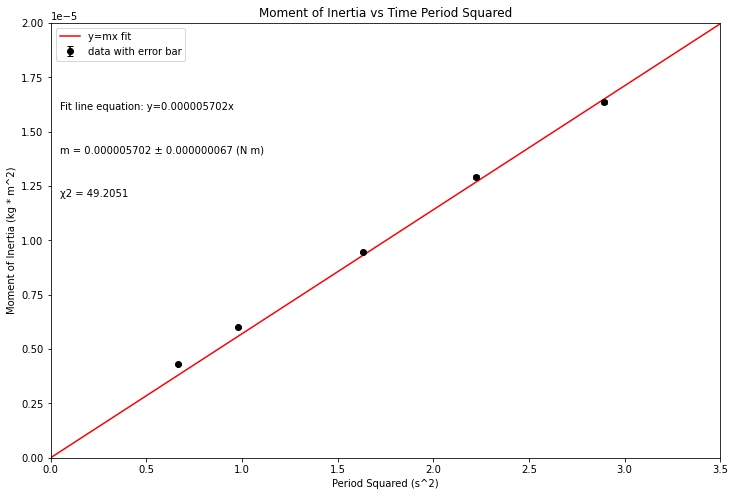

In [14]:
# Plot data with best-fit for the model y=ax
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(0,3.5),model_prop(np.linspace(0,3.5), prop_opt[0]),'r-', label="y=mx fit")
plt.errorbar(x_dat, y_dat, yerr=y_err, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.xlabel('Period Squared (s^2)')
plt.ylabel('Moment of Inertia (kg * m^2)')
plt.title("Moment of Inertia vs Time Period Squared")
plt.xlim(0,3.5)
plt.ylim(0,2e-5)
plt.legend()
plt.text(.05,1.6e-5, "Fit line equation: y=%5.9fx" %(prop_opt[0]))
plt.text(.05,1.4e-5, "m = %5.9f \u00b1 %5.9f (N m)" % (prop_opt[0], prop_err[0]))
y_prop = model_prop(x_dat, prop_opt[0])
chi2_prop = chisq(y_prop, y_dat, y_err)
plt.text(.05,1.2e-5, "χ2 = %5.4f" % (red_chisq(chi2_prop, 5)))

plt.show()

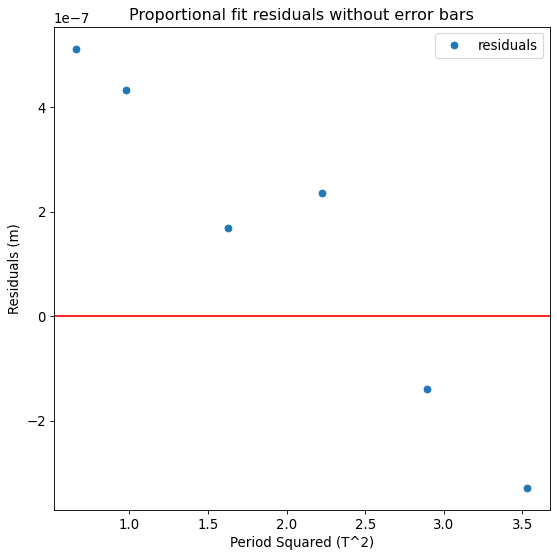

In [20]:
# Predicted y values from the fit to model y=ax
y_prop = model_prop(x_dat, prop_opt[0])

# Proportional model residuals defined
r_prop = y_dat - y_prop


# Sets figure size etc. by starting with plt.figure
fig2=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

# Residuals without error bars
plt.errorbar(x_dat, r_prop, yerr=None, fmt='o', label='residuals')
plt.axhline(color='r') # 0 line for reference

# Axes label and title
plt.title("Proportional fit residuals without error bars")
plt.xlabel("Period Squared (T^2)")
plt.ylabel("Residuals (m)")
plt.legend()
plt.show()

## Repeating the process for the linear model

In [16]:
# The order of the parameter array elements p0, lin_opt, and lin_cov
# are determined by their order [m,b] in the model definition, model_lin(x,m,b):
# we are using an unweighted fit

# Set initial parameters mInit and bInit
mInit=0.025
cInit=-0.05

#fit the unweighted model y=mx+b
lin_opt, lin_cov = opt.curve_fit(model_lin, x_dat, y_dat, p0=[mInit,cInit])

# Predicted values
y_lin = model_lin(x_dat, lin_opt[0], lin_opt[1])

#error in the fit variables
lin_err = np.sqrt(np.diag(lin_cov))  

print('m = {0:6.9f} ± {1:5.12f}'.format(lin_opt[0], lin_err[0]))
print(f"c = {lin_opt[1]:.6f} ±  {lin_err[1]:.6f}")

m = 0.000005417 ± 0.000000036737
c = 0.000001 ±  0.000000


In [17]:
#chi squared for linear case
chi2_lin = chisq(y_lin, y_dat, y_err)

print('χ2 =', chi2_lin) #unformatted, as an example

red_chi2_lin = red_chisq(chi2_lin, 4)
print('χ~2 =', red_chi2_lin)

χ2 = 5.616045870130348
χ~2 = 1.404011467532587


(0, 1.6e-05, 'm = 0.000005417 ± 0.000000037')


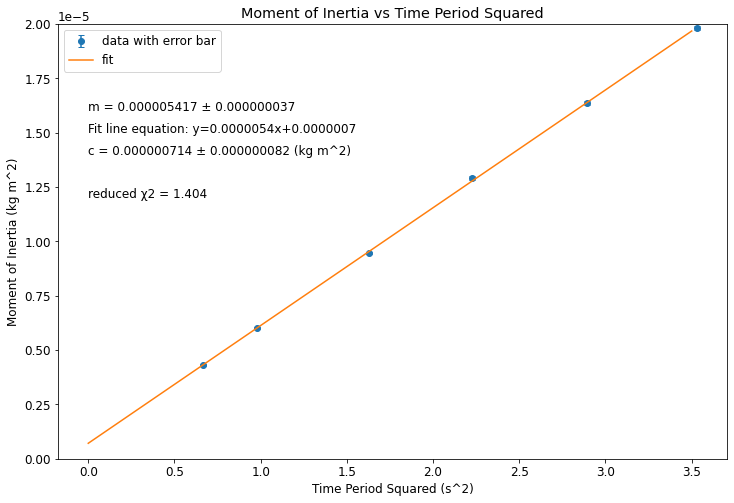

In [24]:
# Best-fit plot with error bars, parameters, chisq

# Sets figure size etc.
fig1 = plt.figure(figsize=(12, 8), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

# Data with error bars
plt.errorbar(x_dat, y_dat, y_err, fmt='o', capsize=3,
             capthick=1, label="data with error bar")

# Best linear fit
# could also use: plt.plot(np.linspace(0,10), model_lin(np.linspace(0,10), lin_opt[0], lin_opt[1]), label='fit')
plt.errorbar(np.linspace(0, 3.5), model_lin(
    np.linspace(0, 3.5), lin_opt[0], lin_opt[1]), label='fit')

# Axes label and title
plt.xlabel('Time Period Squared (s^2)')
plt.ylabel('Moment of Inertia (kg m^2)')
plt.title("Moment of Inertia vs Time Period Squared")
# 
# Best fit parameters, uncertainties, and chisq
plt.text(0, 1.6e-5, "m = %5.9f \u00b1 %5.9f" % (lin_opt[0], lin_err[0]))
plt.text(0, 1.4e-5, "c = %5.9f \u00b1 %5.9f (kg m^2)" % (lin_opt[1], lin_err[1]))
plt.text(0, 1.2e-5, "reduced χ2 = %5.3f" % red_chi2_lin)

plt.text(0, 1.5e-5, "Fit line equation: y=%5.7fx+%5.7f" %
         (lin_opt[0], lin_opt[1]))

plt.ylim(0, 2e-5)
plt.legend()
print((0, 1.6e-5, "m = %5.9f \u00b1 %5.9f" % (lin_opt[0], lin_err[0])))

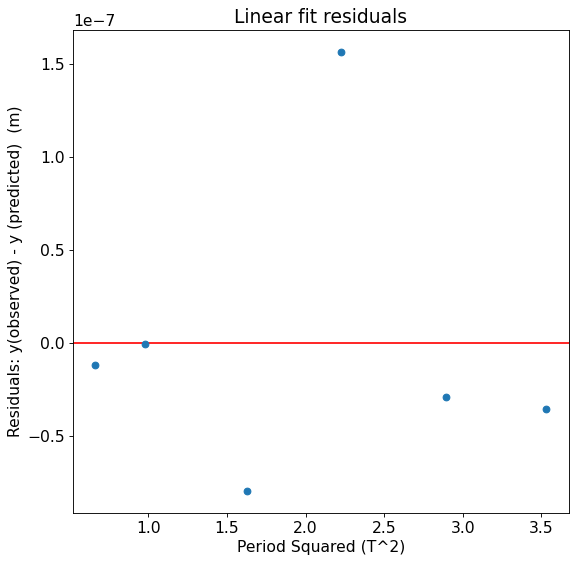

In [21]:
# Residuals plot

# Residuals
r_lin = y_dat- y_lin

# Sets figure size etc.
fig2=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '14'})

# Residuals
plt.errorbar(x_dat, r_lin, fmt='o')
plt.axhline(color='r') # 0 line for reference

# Axes label and title
plt.title("Linear fit residuals")
plt.xlabel("Period Squared (T^2)")
plt.ylabel("Residuals: y(observed) - y (predicted)  (m)")
plt.show()